In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

**About The Data**
The dataset contains 189 countries and uses 2016 data from the WHO report published in 2018. The methodology used by the WHO calculated use by persons 15 years of age or older. All data in columns refer to year 2016.<br>

Unrecorded consumption (homebrew, moonshine, smuggled alcohol, surrogate alcohol etc.) was calculated using expert judgements and surveys. Total is the sum of the recorded and unrecorded consumption. The next four columns are a breakdown of the recorded alcohol consumption by type. Beer refers to malt beer, wine refers to grape wine, spirits refers to all distilled beverages such as vodka and similar products, and the column "other" refers to all other alcoholic beverages, such as rice wine, soju, sake, mead, kumis, cider, kvass, and African beers (kumi kumi, kwete, banana beer, millet beer, umqombothi etc.). Worldwide consumption in 2016 was equal to 6.4 litres of pure alcohol consumed per person aged 15 years or older.<br>

Tabular data includes:<br>

country<br>
total_consumption: litres<br>
recorded_consumption: litres<br>
unrecorded_consumption: litres<br>
beer_percentage<br>
wine_percentage<br>
spirits_percentage<br>
other_percentage<br>
2020_projection<br>
2025_projection

In [2]:
df = pd.read_csv('../DATA/alcohol-consumption.csv')

**Brief Summary Of the data**

In [3]:
df.head()

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 189 non-null    object 
 1   total_consumption       189 non-null    float64
 2   recorded_consumption    189 non-null    float64
 3   unrecorded_consumption  189 non-null    float64
 4   beer_percentage         179 non-null    float64
 5   wine_percentage         179 non-null    float64
 6   spirits_percentage      179 non-null    float64
 7   other_percentage        179 non-null    float64
 8   2020_projection         189 non-null    float64
 9   2025_projection         189 non-null    float64
dtypes: float64(9), object(1)
memory usage: 14.9+ KB


In [5]:
df.isnull().sum()

country                    0
total_consumption          0
recorded_consumption       0
unrecorded_consumption     0
beer_percentage           10
wine_percentage           10
spirits_percentage        10
other_percentage          10
2020_projection            0
2025_projection            0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
160,Iran,1.0,0.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
174,Sudan,0.5,0.0,0.5,NaN,NaN,NaN,NaN,0.0,0.0
179,Pakistan,0.3,0.0,0.3,NaN,NaN,NaN,NaN,0.3,0.4
181,Afghanistan,0.2,0.0,0.2,NaN,NaN,NaN,NaN,0.2,0.2
182,Saudi Arabia,0.2,0.1,0.2,NaN,NaN,NaN,NaN,0.2,0.2
184,Bangladesh,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
185,Kuwait,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
186,Libya,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
187,Mauritania,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
188,Somalia,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0


In [9]:
df = df.dropna(axis=0)

### Exploratory Data Analysis

In [10]:
df.describe()

,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,6.516760,5.197765,1.444693,43.484358,16.306704,29.394413,10.807821,6.592737,6.802235
std,3.981989,3.689995,0.868495,22.147305,18.123067,24.027063,23.013580,3.945343,4.013292
min,0.100000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,2.900000,1.650000,0.900000,28.300000,2.150000,10.850000,0.000000,3.150000,3.250000
50%,6.600000,4.900000,1.400000,39.900000,8.500000,25.400000,0.700000,7.000000,7.000000
75%,9.700000,8.250000,1.800000,56.900000,27.950000,43.750000,4.650000,9.850000,10.300000
max,16.900000,15.800000,5.300000,100.000000,84.700000,97.300000,94.900000,16.200000,18.300000


In [29]:
df.corr()['total_consumption'].sort_values().iloc[:-1].reset_index()

C:\Users\ticitaca_shubham\AppData\Local\Temp\ipykernel_2500\1227974704.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['total_consumption'].sort_values().iloc[:-1].reset_index()


,index,total_consumption
0,beer_percentage,-0.178684
1,spirits_percentage,-0.050077
2,other_percentage,0.021156
3,wine_percentage,0.258070
4,unrecorded_consumption,0.465113
5,2025_projection,0.956653
6,2020_projection,0.966420
7,recorded_consumption,0.966874


C:\Users\ticitaca_shubham\AppData\Local\Temp\ipykernel_2500\10987849.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.barplot(x='index',y='total_consumption',data=df.corr()['total_consumption'].sort_values().iloc[:-1].reset_index())


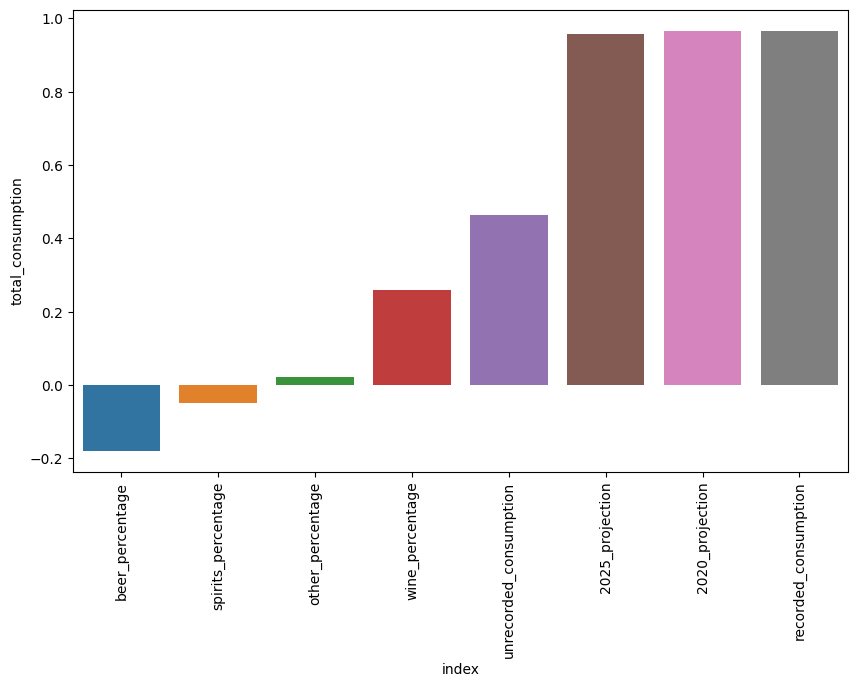

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x='index',y='total_consumption',data=df.corr()['total_consumption'].sort_values().iloc[:-1].reset_index())
plt.xticks(rotation=90);

<AxesSubplot: xlabel='beer_percentage', ylabel='total_consumption'>

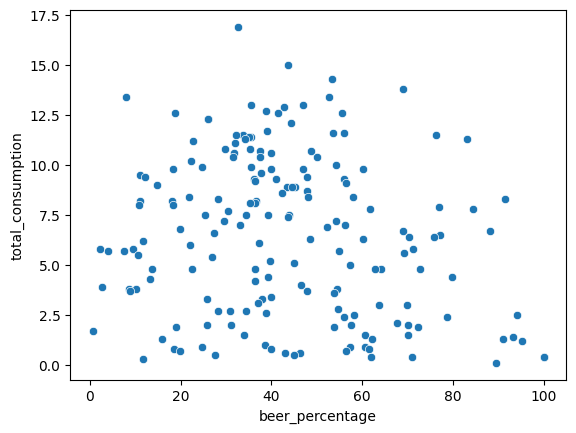

In [34]:
sns.scatterplot(x='beer_percentage',y='total_consumption',data=df)

**Top 5 countries with Highest Consumption**

In [47]:
srt_df = df.sort_values('total_consumption',ascending=False).iloc[:5][['country','total_consumption']]

In [48]:
srt_df

,country,total_consumption
0,Estonia,16.9
1,Lithuania,15.0
2,Czech Republic,14.3
3,Seychelles,13.8
4,Germany,13.4


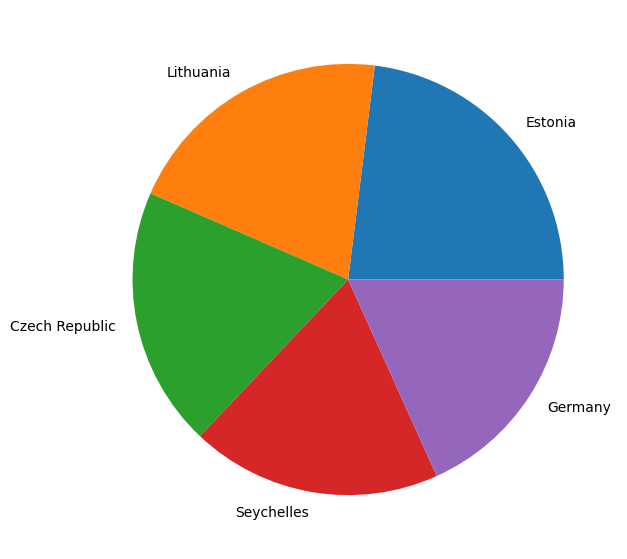

In [50]:
fig = plt.figure(figsize =(10, 7))
plt.pie(srt_df['total_consumption'], labels = srt_df['country'])

plt.show()

### Kmean-Clustering

In [51]:
X = df.drop('country',axis=1)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
scaled_X = scaler.fit_transform(X)

In [55]:
from sklearn.cluster import KMeans

In [56]:
model = KMeans(n_clusters=2)

In [57]:
clusters = model.fit_predict(scaled_X)

In [58]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [59]:
df['clusters'] = clusters

In [60]:
df.head()

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection,clusters
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9,1
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9,1
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4,1
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6,1
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6,1


In [62]:
df.corr()['clusters']

C:\Users\ticitaca_shubham\AppData\Local\Temp\ipykernel_2500\1300906610.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['clusters']


total_consumption         0.850018
recorded_consumption      0.810186
unrecorded_consumption    0.463205
beer_percentage          -0.127978
wine_percentage           0.285615
spirits_percentage       -0.079749
other_percentage         -0.018379
2020_projection           0.858785
2025_projection           0.860448
clusters                  1.000000
Name: clusters, dtype: float64

In [63]:
df.sort_values('total_consumption',ascending=False).iloc[:5]

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection,clusters
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9,1
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9,1
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4,1
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6,1
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6,1


In [64]:
df.sort_values('total_consumption').iloc[:5]

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection,clusters
183,Yemen,0.1,0.0,0.0,89.5,0.0,10.5,0.0,0.1,0.1,0
180,Syria,0.3,0.2,0.1,11.6,1.1,87.2,0.0,0.3,0.3,0
177,Iraq,0.4,0.2,0.2,71.0,2.4,25.7,0.9,0.5,0.6,0
175,Brunei,0.4,0.6,0.2,100.0,0.0,0.0,0.0,0.4,0.3,0
178,Kiribati,0.4,0.4,0.2,100.0,0.0,0.0,0.0,0.4,0.4,0


<AxesSubplot: xlabel='total_consumption', ylabel='Density'>

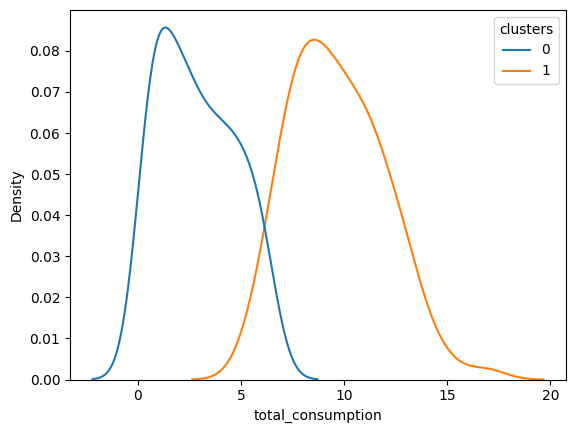

In [67]:
sns.kdeplot('total_consumption',data=df,hue='clusters')

**Here we can see countries with Higher alcohol consumption are clustered in one group and countries with lower alcohol consumption are clustered in another group**